In [13]:
using Random
using LinearAlgebra
using Plots

In [14]:
function gen_matr(n)
    M = rand(n, n)
    M
end

function mulmat(A, B)
    n = size(A, 1)
    C = zeros(n, n)
    for i in 1:n
        for j in 1:n
            C[i, j] = C[i, j] + dot(A[i, 1:n], B[1:n, j])
        end
    end
    C
end

mulmat (generic function with 1 method)

In [15]:
function vinograd(A, B)
    n = size(A, 1)
    C = zeros(n, n)
    m = div(n, 2)
    for i in 1:n
        for j in 1:n
            sum1 = sum2 = sum3 = 0
            for k in 1:m
                sum1 += (A[i, 2*k-1] + B[2*k, j]) * (B[2*k-1, j] + A[i, 2*k])
                sum2 += A[i, 2*k-1] * A[i, 2*k]
                sum3 += B[2*k, j] * B[2*k-1, j]
            end
            C[i, j] = sum1 - sum2 - sum3
        end
    end
    C
end

vinograd (generic function with 1 method)

In [16]:
function strass(A, B, n_min=64)
    n = size(A, 1)
    C = zeros(n, n)
    if n <= n_min
        C = mulmat(A, B)
    else
        m = div(n, 2)
        u = 1:m
        v = m+1:n
        P1 = strass(A[u, u] + A[v, v], B[u, u] + B[v, v], n_min)
        P2 = strass(A[v, u] + A[v, v], B[u, u], n_min)
        P3 = strass(A[u, u], B[u, v] - B[v, v], n_min)
        P4 = strass(A[v, v], B[v, u] - B[u, u], n_min)
        P5 = strass(A[u, u] + A[u, v], B[v, v], n_min)
        P6 = strass(A[v, u] - A[u, u], B[u, u] + B[u, v], n_min)
        P7 = strass(A[u, v] - A[v, v], B[v, u] + B[v, v], n_min)

        C[u, u] = P1 + P4 - P5 + P7
        C[u, v] = P3 + P5
        C[v, u] = P2 + P4
        C[v, v] = P1 + P3 - P2 + P6
    end
    C
end

strass (generic function with 2 methods)

In [17]:
function measure_time(f, A, B)
    t = @elapsed f(A, B)
    return t
end

function plot_results(sizes, times_ordinary, times_strassen, times_vinograd)
    plt = plot(
        sizes,
        times_ordinary,
        label="Обычный алгоритм",
        color=:blue,
        linestyle=:solid,
        linewidth=2,
        marker=:circle,
        xlabel="Размер матрицы N",
        ylabel="Время (сек)",
        title="Сравнение времени умножения матриц",
        grid=true,
        gridalpha=0.3
    )
    
    plot!(
        plt,
        sizes,
        times_strassen,
        label="Метод Штрассена",
        color=:red,
        linestyle=:solid,
        linewidth=2,
        marker=:square
    )
    
    plot!(
        plt,
        sizes,
        times_vinograd,
        label="Алгоритм Винограда",
        color=:green,
        linestyle=:solid,
        linewidth=2,
        marker=:diamond
    )
    
    return plt
end

plot_results (generic function with 1 method)

Размер 2: обычный=8.542e-6, Штрассен=5.584e-6, Виноград=3.083e-6
Размер 4: обычный=3.166e-6, Штрассен=1.0e-6, Виноград=2.92e-7
Размер 8: обычный=2.5e-6, Штрассен=3.667e-6, Виноград=7.5e-7
Размер 16: обычный=1.1625e-5, Штрассен=1.2e-5, Виноград=3.75e-6
Размер 32: обычный=7.0917e-5, Штрассен=0.000107791, Виноград=3.1666e-5
Размер 64: обычный=0.00114, Штрассен=0.001261, Виноград=0.000193375
Размер 128: обычный=0.024189125, Штрассен=0.008808375, Виноград=0.001414166
Размер 256: обычный=0.057886417, Штрассен=0.029456292, Виноград=0.015882083


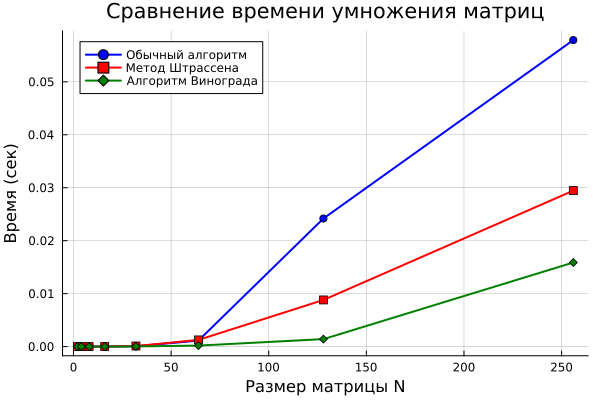

In [18]:
sizes = [2, 4, 8, 16, 32, 64, 128, 256]
times_ordinary = Float64[]
times_strassen = Float64[]
times_vinograd = Float64[]

for n in sizes
    A = gen_matr(n)
    B = gen_matr(n)

    push!(times_ordinary, measure_time(mulmat, A, B))
    push!(times_strassen, measure_time(strass, A, B))
    push!(times_vinograd, measure_time(vinograd, A, B))

    println("Размер $n: обычный=$(times_ordinary[end]), Штрассен=$(times_strassen[end]), Виноград=$(times_vinograd[end])")
end

plt = plot_results(sizes, times_ordinary, times_strassen, times_vinograd)
display(plt)